# In this notebook:

## Univariate regression

### linear dataset with noise --> linear regression

### quadratic dataset with noise --> polynomial regression

## extension to multivariate regression:  >1 input features

## Evaluating model performance:
- standard metrics: RMSE, MSE, MAE, R^2 score
- training/test set split and generalisation error

## the overfitting problem: how to spot and deal with it

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression, make_sparse_uncorrelated

### generating a univariate dataset for regression with a noise factor (0 mean, 1 variance)

#### you may change these variables and see their effect:

`rand_noise_mu`

`rand_noise_std`

In [19]:



# 30 instances
m = 30

# coeff and intercept
coeff_true = 2
intercept_true = 0.5

X = np.linspace(-1,1,m)

rand_noise_mu = 0
rand_noise_std = 1

rand_noise = np.random.normal(rand_noise_mu, rand_noise_std, m)
Y_true = intercept_true + coeff_true * X + rand_noise

In [20]:
X = np.reshape(X, (-1, 1))  
print(X.shape)

regr = linear_model.LinearRegression()
regr.fit(X, Y_true)
Y_pred = regr.predict(X)

(30, 1)


In [21]:
intercept = regr.intercept_
coeff = regr.coef_
print('intercept: predicted %f; true %f'% (intercept, intercept_true))
print('coeff: predicted: %f; true %f' % (coeff, coeff_true))

intercept: predicted 0.556166; true 0.500000
coeff: predicted: 1.758849; true 2.000000


### evaluating standard metrics for regression model performance:

In [22]:
print("mean squared error: %f" % mean_squared_error(Y_true, Y_pred))
print("R^2 = %f" % regr.score(X, Y_true))
print('range of response variable Y: [%f,%f]' % (Y_true.min(), Y_true.max()))



mean squared error: 0.978976
R^2 = 0.529627
range of response variable Y: [-2.489160,2.971469]


### visual rendering of data and the linear fit

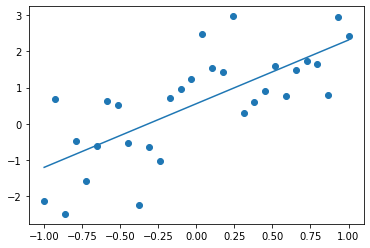

In [23]:
plt.scatter(X, Y_true)
plt.plot(X, Y_pred)
plt.show()

## fitting a nonlinear univariate dataset to a linear model

#### you may change these variables and see their effect:

`a`, `b`

In [65]:
m= 100   ## range for random sampled from a standard normal distribution

mu = 3
stddev = 6
X = stddev * np.random.rand(m,1) - mu   

a = 1
b = 2

Y_true = a * X**2 + b * X + 2 + np.random.randn(m,1)
X = np.reshape(X, (-1, 1))

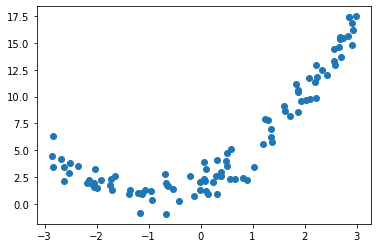

In [66]:
plt.scatter(X, Y_true)

In [67]:
regr = linear_model.LinearRegression()
regr.fit(X, Y_true)
Y_pred = regr.predict(X)

print("mean squared error: %f" % mean_squared_error(Y_true, Y_pred))
print("R^2 = %f" % regr.score(X, Y_true))
print('range of response variable Y: [%f,%f]' % (Y_true.min(), Y_true.max()))

mean squared error: 9.208967
R^2 = 0.660760
range of response variable Y: [-0.933283,17.475623]


the linear model does not seem to fit the data at all!

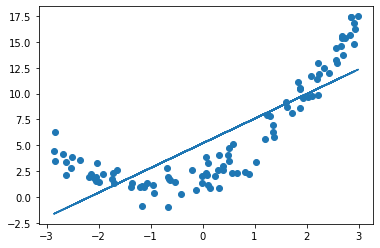

In [68]:
plt.scatter(X, Y_true)
plt.plot(X, Y_pred)
plt.show()

let use try a polynomial regression instead. 

we accomplish this in 2 steps:
- transform the X features into X^2
- fit a linear model to the transformed features

In [69]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [70]:
regr = linear_model.LinearRegression()
regr.fit(X_poly, Y_true)
Y_pred = regr.predict(X_poly)

print("mean squared error: %f" % mean_squared_error(Y_true, Y_pred))
print("R^2 = %f" % regr.score(X_poly, Y_true))
print('range of response variable Y: [%f,%f]' % (Y_true.min(), Y_true.max()))

mean squared error: 0.984688
R^2 = 0.963726
range of response variable Y: [-0.933283,17.475623]


intercept: 
 [1.95417799]
coeff: 
 [[2.03508446 1.02795487]]


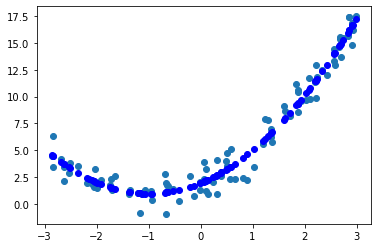

In [71]:
intercept = regr.intercept_
coeff = regr.coef_
print('intercept: \n', intercept)
print('coeff: \n', coeff)

plt.scatter(X, Y_true)
plt.plot(X,Y_pred, "bo")
plt.show()

In [62]:
regr = linear_model.LinearRegression()
regr.fit(X_poly, Y_true)
Y_pred = regr.predict(X_poly)

print("mean squared error: %f" % mean_squared_error(Y_true, Y_pred))
print("R^2 = %f" % regr.score(X_poly, Y_true))
print('range of response variable Y: [%f,%f]' % (Y_true.min(), Y_true.max()))

mean squared error: 0.921326
R^2 = 0.855365
range of response variable Y: [0.301078,10.099642]


## we can also generate a synthetic dataset using `sklearn.datasets.make_regression`

this is convenient to illustrate _overfitting_

here we can control the amount of noise. this is the standard deviation of the gaussian noise applied to the output.

### note that we can extend to multivariate regression simply by changing the number of features

reference on the generator: 
[make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression)

#### try changing:

`n_features` (in relation to `n_samples`)

`noise`

In [140]:
n_features= 50

## noise The standard deviation of the gaussian noise applied to the output.
X, Y_true, coeff_true = make_regression(n_samples=100, n_features=n_features, n_informative = n_features, noise=2.0, random_state=1, coef=True)

# Only the first 4 features are informative. The remaining features are useless.
# X, Y_true = make_sparse_uncorrelated(n_samples=100, n_features=n_features, random_state=True)



In [141]:
regr = linear_model.LinearRegression()
regr.fit(X, Y_true)
Y_pred = regr.predict(X)

intercept = regr.intercept_
coeff = regr.coef_

if n_features == 1:
    print('coeff: predicted: %f; true %f' % (coeff, coeff_true))

print("mean squared error: %f" % mean_squared_error(Y_true, Y_pred))
print("R^2 = %f" % regr.score(X, Y_true))
print('range of response variable Y: [%f,%f]' % (Y_true.min(), Y_true.max()))


mean squared error: 1.616582
R^2 = 0.999990
range of response variable Y: [-944.119088,1099.634535]


In [142]:
if n_features == 1:
    plt.scatter(X, Y_true)
    plt.plot(X, Y_pred)
    plt.show()

## overfitting: 

### how do we know the model predicts accurately on unseen instances?

In [143]:
from sklearn.model_selection import train_test_split

XTrain, XTest, YTrain, YTest = train_test_split(X, Y_true, test_size = 0.3, random_state = 10)

In [144]:
regr = linear_model.LinearRegression()
regr.fit(XTrain, YTrain)
intercept = regr.intercept_
coeff = regr.coef_


### note that we are now predicting on the Test set not on the training set

In [145]:
Y_pred = regr.predict(XTest)

if n_features == 1:
    print('coeff: predicted: %f; true %f' % (coeff, coeff_true))

print("mean squared error: %f" % mean_squared_error(YTest, Y_pred))
print("R^2 = %f" % regr.score(XTest, YTest))
print('range of response variable Y: [%f,%f]' % (YTest.min(), YTest.max()))

mean squared error: 11.104550
R^2 = 0.999913
range of response variable Y: [-944.119088,593.859598]


### why is this happening?

- perhaps the dataset is not linear (see example above)
- too few instances in the training set (go back and increase the size of the training set and observe the effect)
- model learnt from many irrelevant variables

## Mitigating overfitting through _regularisation_

### 1. Ridge regression

#### try changing alpha: 0.1, 0.01, 0.001...

In [167]:
from sklearn.linear_model import Ridge

regr = Ridge(alpha=0.1)
regr.fit(XTrain, YTrain)

Ridge(alpha=0.1)

In [168]:
Y_pred = regr.predict(XTest)

if n_features == 1:
    print('coeff: predicted: %f; true %f' % (coeff, coeff_true))

print("mean squared error: %f" % mean_squared_error(YTest, Y_pred))
print("R^2 = %f" % regr.score(XTest, YTest))
print('range of response variable Y: [%f,%f]' % (YTest.min(), YTest.max()))

mean squared error: 20.303135
R^2 = 0.999841
range of response variable Y: [-944.119088,593.859598]


### 2. Lasso regression

In [175]:
regr = linear_model.Lasso(alpha=0.1)
regr.fit(XTrain, YTrain)

Lasso(alpha=0.1)

In [174]:
Y_pred = regr.predict(XTest)

if n_features == 1:
    print('coeff: predicted: %f; true %f' % (coeff, coeff_true))

print("mean squared error: %f" % mean_squared_error(YTest, Y_pred))
print("R^2 = %f" % regr.score(XTest, YTest))
print('range of response variable Y: [%f,%f]' % (YTest.min(), YTest.max()))

mean squared error: 12.946160
R^2 = 0.999898
range of response variable Y: [-944.119088,593.859598]


### 3. ElasticNet

In [180]:
from sklearn.linear_model import ElasticNet

regr = ElasticNet(alpha=1.0)
regr.fit(XTrain, YTrain)


ElasticNet()

In [181]:
Y_pred = regr.predict(XTest)

if n_features == 1:
    print('coeff: predicted: %f; true %f' % (coeff, coeff_true))

print("mean squared error: %f" % mean_squared_error(YTest, Y_pred))
print("R^2 = %f" % regr.score(XTest, YTest))
print('range of response variable Y: [%f,%f]' % (YTest.min(), YTest.max()))

mean squared error: 28679.883412
R^2 = 0.774773
range of response variable Y: [-944.119088,593.859598]
